In [1]:
# -*- coding:utf-8 -*-
%pylab inline
from elasticsearch import Elasticsearch
from pprint import pprint as pp
from lshash import LSHash
import base64
import cv2
import numpy as np
print 'OpenCV Version: ' + cv2.__version__

es = Elasticsearch([{'host': 'localhost', 'port': 9200}])

Populating the interactive namespace from numpy and matplotlib
OpenCV Version: 3.1.0-dev


# OpenCV, LSH Functions

In [2]:
def read_img(location):
    img = cv2.imread(location)
    img = cv2.resize(img, (130, 130))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray

def sift(img):
    _sift = cv2.xfeatures2d.SIFT_create()
    kps, des = _sift.detectAndCompute(img, None) 
    return kps, des

def encode(des):
    des = des.flatten()
    return base64.b64encode(''.join(map(lambda x: str(x), des.tolist())))

def lsh(des):
    des = des.flatten()
    s = LSHash(100, des.shape[0])
    s.index(des)
    return s.hash_tables[0].keys()[0]    

def display_keypoints(gray, kps, img):
    kp_img = cv2.drawKeypoints(gray, kps, img) 
    imshow(img, cmap='Greys_r')

def display(img, gray):    
    print 'image1 shape:\t', img.shape
    print 'gray1 shape:\t', gray.shape
    imshow(gray, cmap='Greys_r')

image1 shape:	(130, 130, 3)
gray1 shape:	(130, 130)


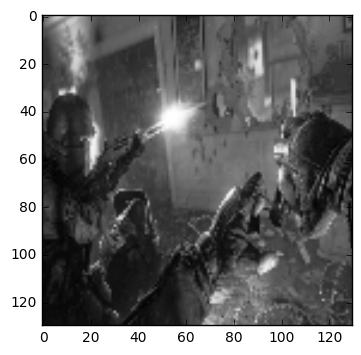

In [3]:
img1, gray1 = read_img('../data/images/rainbowsix.jpg')
kps1, des1 = sift(img1)
b64img1 = encode(des1)
display(img1, gray1)

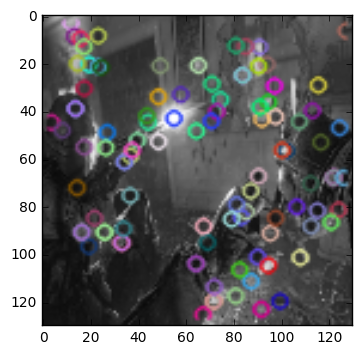

In [4]:
display_keypoints(gray1, kps1, img1)

image1 shape:	(130, 130, 3)
gray1 shape:	(130, 130)


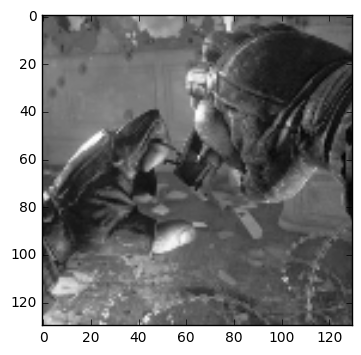

In [5]:
img2, gray2 = read_img('../data/images/rainbosix_cropped.jpg')
kps2, des2 = sift(img2)
b64img2 = encode(des1)

display(img2, gray2)

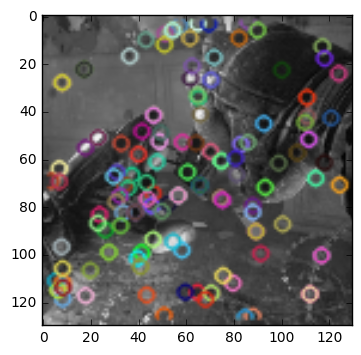

In [6]:
display_keypoints(gray2, kps2, img2)